<p style="font-size:25px; color:#496595"> ¿Qué se hará? </p>

> <b>En esta sección se llevan varios pasos clave:</b>

>- <b>Eliminar filas de registros cuya venta no es un número:</b>
En este paso se eliminaran los registros detectados en la fase de "1_Extracción" que no tienen valores de ventas aceptados porque aparecen con este texto "ImationÂ Secure+ Hardware Encrypted USB 2.0Â Flash Drive".Los indices a eliminar son, 181,430,431,1406,1969,1971.

>- <b>Cambiar el nombre de las columnas al español:</b>
Para hacer más sencillo el entendimiento de las columnas al hacer los analisis se traduciran al español

>- <b>Actualizar tipo de dato:</b>
En el anterior paso se detecto todos los datos como tipo object lo cual esta mal para algunas columnas por ser numericas y tipo fecha, vamos a corregir esto.

>- <b>Extraer dia,mes,semana y año de la fecha de envio y entrega:</b> 
Se van a necesitar los campos mencionados, como no existen se extraeran usando como base los campos de fecha.

<p style="font-size:25px; color:#496595">1. Eliminar filas de registros cuya venta no es un número</p>

In [9]:
#==== Importación de librerias a usar ====
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#===Extracción de archivo Extracción.pickle ===
df_ventas= pd.read_pickle('extracción.pkl')

In [11]:
#===Eliminar filas ===
df_ventas=df_ventas.drop([181,430,431,1406,1969,1971],axis=0) #Elimación de filas

#Validación
df_ventas[df_ventas['Sales'].str.contains('a-zA-Z')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


<p style="font-size:25px; color:#496595">2. Cambiar el nombre de las columnas al español</p>

In [12]:
df_ventas = df_ventas.rename({
    'Order ID':'id_pedido', 
    'Order Date':'fecha_orden', 
    'Ship Date':'fecha_entrega', 
    'Ship Mode':'modo_envio', 
    'Customer ID':'id_cliente',
    'Customer Name':'cliente', 
    'Segment':'segmento', 
    'Country':'pais',
    'City':'ciudad', 
    'State':'estado',
    'Postal Code':'codigo_postal',
    'Region':'region', 
    'Product ID':'id_producto', 
    'Category':'categoria', 
    'Sub-Category':'sub_categoria', 
    'Product Name':'producto',
    'Sales':'venta'   
},axis='columns')

<p style="font-size:25px; color:#496595">3. Actualizar tipo de dato</p>

In [13]:
df_ventas["venta"]=df_ventas.venta.apply(lambda x:x.replace('.','')) #Reemplaza los puntos por coma
df_ventas["venta"]=df_ventas["venta"].astype('int') #Convierte el campo venta a numero tipo entero
#Convierte los campos de object a fecha
df_ventas[["fecha_orden","fecha_entrega"]]=df_ventas[["fecha_orden","fecha_entrega"]].applymap(lambda x:pd.to_datetime(x,format='%d/%m/%Y')) 

In [14]:
df_ventas.dtypes

Row ID                   object
id_pedido                object
fecha_orden      datetime64[ns]
fecha_entrega    datetime64[ns]
modo_envio               object
id_cliente               object
cliente                  object
segmento                 object
pais                     object
ciudad                   object
estado                   object
codigo_postal            object
region                   object
id_producto              object
categoria                object
sub_categoria            object
producto                 object
venta                     int32
dtype: object

<p style="font-size:25px; color:#496595">4. Extraer dia,mes,semana y año de la fecha de envio y entrega</p> 

In [15]:
#=== Extraer dia,mes,semana y año de la fecha de envio y entrega ===
df_ventas[['dia_orden','dia_entrega']]=df_ventas[["fecha_orden","fecha_entrega"]].apply(lambda x:x.dt.day)
meses_espanol = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}
df_ventas[['mes_orden','mes_entrega']]=df_ventas[["fecha_orden","fecha_entrega"]].apply(lambda x:x.dt.month.map(meses_espanol).map(str).str[:3].str.title())
df_ventas[['semana_orden', 'semana_entrega']] = df_ventas[['fecha_orden', 'fecha_entrega']].apply(lambda x: x.dt.isocalendar().week)
df_ventas[['año_orden','año_entrega']]=df_ventas[["fecha_orden","fecha_entrega"]].apply(lambda x:x.dt.year)
df_ventas['trimestre']=df_ventas["fecha_orden"].dt.quarter
df_ventas['día_de_la_semana'] = df_ventas['fecha_orden'].dt.day_name()

In [16]:
#===Estadisticas del dataframe ===
df_ventas.describe().applymap(lambda x:int(x))

,venta,dia_orden,dia_entrega,semana_orden,semana_entrega,año_orden,año_entrega,trimestre
count,9794,9794,9794,9794,9794,9794,9794,9794
mean,113678,15,15,32,32,2016,2016,2
std,522017,8,8,14,14,1,1,1
min,3,1,1,1,1,2015,2015,1
25%,2537,8,8,21,20,2016,2016,2
50%,11096,16,16,35,36,2017,2017,3
75%,53995,23,24,45,45,2018,2018,4
max,23962656,31,31,53,53,2018,2019,4


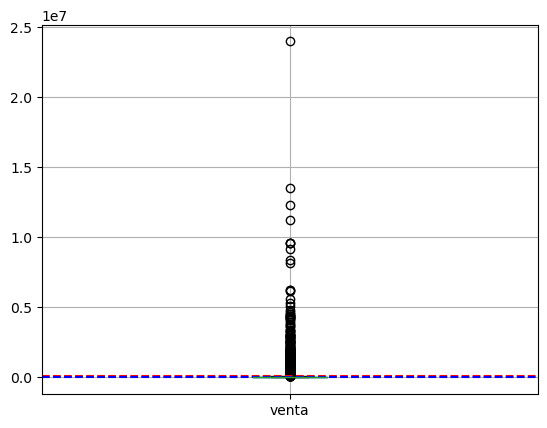

'\nHay varios valores atipicos revisaremos el porque\n'

In [17]:
mean=df_ventas.venta.mean() #113678
median=df_ventas.venta.median() #11096
df_ventas.boxplot(column='venta',grid=True,)
plt.axhline(mean, color='red', linestyle='--', label='Media')
plt.axhline(median, color='blue', linestyle='--', label='Mediana')
plt.show()

'''
Hay varios valores atipicos revisaremos el porque
'''

In [18]:
#=== filtrar el dataframe por venta de mayor a menor, los 10 primeros valores
filtro_ventas_altas=df_ventas.sort_values('venta',ascending=False)[:10][['producto','venta','cliente','fecha_orden','fecha_entrega', 'modo_envio']]   
filtro_ventas_altas

,producto,venta,cliente,fecha_orden,fecha_entrega,modo_envio
399,"Riverside Palais Royal Lawyers Bookcase, Royal...",23962656,Anna Gayman,2017-09-08,2017-09-10,Second Class
5055,O'Sullivan Living Dimensions 5-Shelf Bookcases,13523976,Amy Hunt,2016-01-03,2016-01-08,Second Class
8781,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",12279984,Craig Molinari,2016-03-01,2016-03-04,First Class
2623,Canon imageCLASS 2200 Advanced Copier,11199968,Tom Ashbrook,2018-10-22,2018-10-24,First Class
3,Bretford CR4500 Series Slim Rectangular Table,9575775,Sean O'Donnell,2016-10-11,2016-10-18,Standard Class
4266,O'Sullivan Plantations 2-Door Library in Landv...,9566648,Emily Phan,2017-11-05,2017-11-09,Standard Class
2403,O'Sullivan Plantations 2-Door Library in Landv...,9566648,Harry Marie,2017-09-27,2017-10-03,Standard Class
4495,"Bush Andora Bookcase, Maple/Graphite Gray Finish",9179235,Craig Carreira,2018-06-18,2018-06-23,Standard Class
6425,Canon imageCLASS 2200 Advanced Copier,8399976,Christopher Conant,2017-05-23,2017-05-27,Standard Class
165,Lexmark MX611dhe Monochrome Laser Printer,8159952,Becky Martin,2015-09-08,2015-09-12,Standard Class


In [19]:
#---Filtrar dataframe por el producto más caro ---
Riverside=df_ventas[df_ventas['producto'].isin(['Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish'])][['producto','cliente','venta','fecha_orden', 'fecha_entrega', 'ciudad','id_pedido']].sort_values('venta',ascending=False)
Riverside

,producto,cliente,venta,fecha_orden,fecha_entrega,ciudad,id_pedido
399,"Riverside Palais Royal Lawyers Bookcase, Royal...",Anna Gayman,23962656,2017-09-08,2017-09-10,Houston,CA-2017-108987
5917,"Riverside Palais Royal Lawyers Bookcase, Royal...",Peter Fuller,4228704,2016-09-17,2016-09-23,New York City,US-2016-126977
7814,"Riverside Palais Royal Lawyers Bookcase, Royal...",Maureen Gastineau,1497666,2018-06-08,2018-06-10,Los Angeles,US-2018-109316
27,"Riverside Palais Royal Lawyers Bookcase, Royal...",Tracy Blumstein,308343,2016-09-17,2016-09-21,Philadelphia,US-2016-150630
9741,"Riverside Palais Royal Lawyers Bookcase, Royal...",Quincy Jones,44049,2016-11-08,2016-11-12,Burlington,CA-2016-117086


<p style="font-size:19px; color:blue">📌Interpretación: </p>

>  <b>Se puede ver que hay una transacción bastante alta y solo la realizo un cliente,vimos a cuanto se ha vendido el mismo producto a otros clientes y los valores no se asemejan, por lo que se podria concluir que hubo:</b>

> - Error de entrada de datos: Es posible que haya ocurrido un error al ingresar o registrar el precio en el registro con el valor más alto.

> - Variabilidad en las características: Es posible que el registro con el precio más alto corresponda a una variante especial del producto que tiene características únicas o de mayor calidad en comparación con los otros registros.

> - Factores externos: Podrían haber factores externos que influyen en el precio, como una ubicación geográfica específica, costos adicionales de envío o impuestos. Estos factores podrían haber contribuido a la diferencia en el precio.

> Omitiremos este registro para que no afecte a la tendencia y los siguientes analisis.


In [20]:
#-- Eliminación de valor atipico venta= 23.962.656
df_ventas=df_ventas.drop([399],axis=0)

In [21]:
#===Guardado de dataframe transformación en archivo pickle ===
df_ventas.to_pickle('transformación.pkl')